# Regression Variants with Interactions and Polynomials

Class,

The linear nature of linear models means that they're limited in what patterns they can capture, particularly so in low-dimensional spaces.

What can be done to ameliorate this? One option is to *augment* or *expand* the input space with more features derived from the existing feature set.

Transformations, interactions and polynomials enter the picture here. But why do this? How much would it help matters? 

Let me first briefly head to the slides to introduce conceptually the point of interactions and polynomials. Then we'll see how these play out in ML. 

### Import required libraries

First things first - the setup piece.

In [2]:
## setup chunk
import mglearn
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

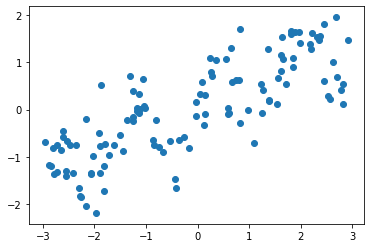

In [3]:
# simulate data for this exercise
X, y = mglearn.datasets.make_wave(n_samples=120)

# view data scatterplot pattern
plt.scatter(X, y)

Well, what does it look like? Wavy? There seems to be a linear trend, sure, but variance around any linear fit will likely be high. 

## Starting with Simple Linear Regression

Plan next is to fit a simple linear regression using the Ordinary Least Squares (OLS) method to assess how well the data pattern is *captured* by OLS.

Since simple linear regressions are familiar to you (recall Stats 101), to speed things up, I'll speed over the OLS piece a tad. 

In [4]:
from sklearn.linear_model import LinearRegression

# run simple lin regression & plot
reg = LinearRegression().fit(X, y)  # instantiate and fit model

# view traditional reg results
print("Regn intercept is: ", reg.intercept_)
print("Regn slope is: ", reg.coef_)

Regn intercept is:  0.06252068365491574
Regn slope is:  [0.44384045]


Above are the intercept and slope for the regression. 

But let's get to the intesresting part - a plot to see for ourselves how well this thing does. 

Behold.

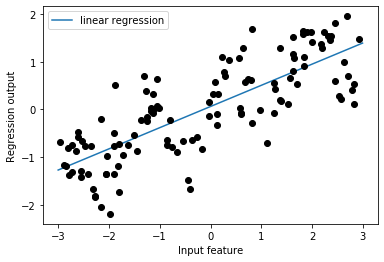

In [5]:
# now plot and view regn
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)  # demarking x-axis into 1000 parts
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Now, contrast the wave-ish pattern the dots make in simple, low-dimensional 2-D space with what the OLS is able to *capture* in this low-D space. 

Clearly, the linear model represented by that blue line leaves much to be desired when it comes to capturing the pattern. 

For instance, consider only the leftmost part of the plot given by x-range (-3,-2). If only this data were available to us, an OLS would fit a downward sloping line! Same with x-range (2,3).

Wouldn't it be better if we could somehow *split* the data into parts (called *bins*) within which we fit smaller linear regressions that should better capture the pattern?

That strategy is what we use below. 

### Binned Regressions 

For demo purposes, let's start with making, say, K=10 bins.

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


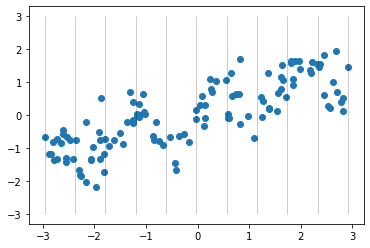

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

# perform binning
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense') # instantiate model with K=10 bins
kb.fit(X)    # fit on training data
print("bin edges: \n", kb.bin_edges_)  # see where the bin thresholds are

# view the paritioned data now
plt.scatter(X, y)
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

We plot OLS within each bin. To do that, we'll need to encode the information of each data point's bin membership.

But since the bin labels are nominal-valued (recall 4 primary scales from MKTR) we'll need 10 binary variables for the 10 bins, each saying whether or not a data point is in that bin.

IOW, we have to **One-Hot encode** the information. See below.

In [8]:
# transform inputs X to X_binned with bin information    
X_binned = kb.transform(X)
print("Shape of Original X: ", X.shape)
print("\n")
print("Shape of X_binned: ", X_binned.shape)

Shape of Original X:  (120, 1)


Shape of X_binned:  (120, 10)


## Regressions with Interaction Terms

Recall what an *interaction term* was. Product of two variables (at least 1 categorical) that captures *intersection* patterns in the data.

Interaction terms also represent new features of sorts, in their own right.

In the above synthetic example, while we had only 1 feature X, we created 10 dummy variables (binary encoded) for bin membership. 

What might result should X interact with bin membership? Each bin could, at least in theory, have its own regression slope. 

Behold.

(120, 20)


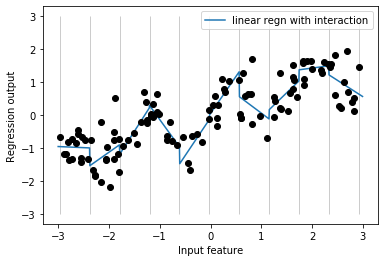

In [10]:
# Lin Reg with Interactions
X_product = np.hstack([X_binned, X * X_binned]) # interacting X with bin memberships
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)
line_binned = kb.transform(line)
line_product = np.hstack([line_binned, line * line_binned])

plt.plot(line, reg.predict(line_product), label='linear regn with interaction')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Fit is better now in that RMSE will be lower than in the OLS case. But what about explanatory and predictive power? That's a Q for another day.

Right now, consider this, doesn't the model line look jagged with several discontinuities? Could we do better? Could we somehow *smoothen* the curve to well, look like a curve, eh?

Well, sure we can. Say hello to polynomial regressions. 

## Polynomial Regressions

While we saw in the slides a quadratic (i.e., second power) regression, nothing really stopping us from going to higher (i.e., polynomial) powers.

We'll use inbuilt python routines that take each colm of interest and create features upto the nth power.

Behold. 

In [11]:
# Lin regn with polynomials upto the tenth power!
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("Shape of X-Poly: ", X_poly.shape)
print("\n\n")
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

# view what poly entries are like...
df_poly = pd.DataFrame(X_poly)
df_poly.columns = list(poly.get_feature_names())
df_poly.iloc[:5, :5]  # view 5 rows and 5 colms

Shape of X-Poly:  (120, 10)



Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


,x0,x0^2,x0^3,x0^4,x0^5
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702
1,2.704286,7.313162,19.776880,53.482337,144.631526
2,1.391964,1.937563,2.697017,3.754150,5.225640
3,0.591951,0.350406,0.207423,0.122784,0.072682
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187


Note above that the first colm is X itself (to the first power), the second colm is quadratic in X, third colm is third power of X and so on.

Let's plot and see what model fit to data looks like. Behold.

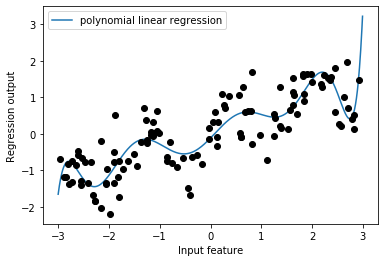

In [12]:
# Now plot and see
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Much better, eh? Problem could be that the model starts to act weird at the boundaries. Think of the predictions it may do for boundary cases. 

So what can we do about it? Well, more complex algos exist that take care of such issues, among others.

And since they're more complex, they require more handling and care. Or *tuning* of their hyperparameters, in ML parlance. 

I'll demo one such algo next - SVR for Support Vector Regression. It's math is complex and out of scope here.

### A brush with Kernalized Regressions

Further, it's intuition (more generally that for *kernelized* regressions) I'll put off to another day, in the interest of time.

For now, just see what it does.

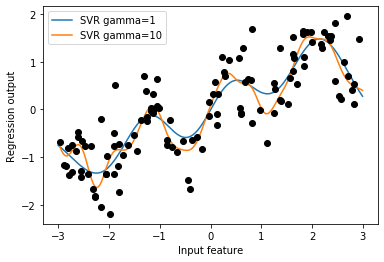

In [13]:
from sklearn.svm import SVR

# gamma is hyperparm for SVR. Testing two values of gamme
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

How do support vetor machines work in general? We'll get there naother time.

Time to head back to the slides for now.

Voleti